# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [10]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


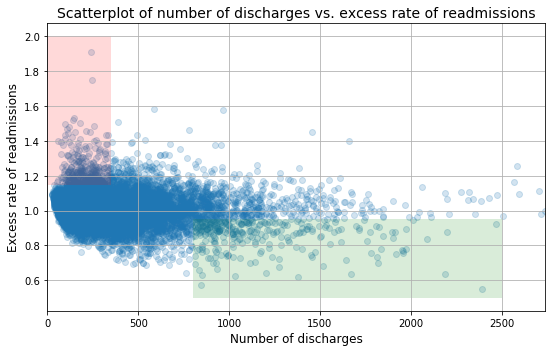

In [11]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A) Do you agree with the above analysis and recommendations? Why or why not?

I do not support the analysis and recommendations offered above. In short, the analysis misses the forest for the trees. It relies on outliers to portray the general tendency and exaggerates the significance of the relationship between discharges and readmissions.

The recommendations made on the basis of this analysis would penalize small hospitals operating at normal and low readmission rates based on the behavior of a relatively small group of outliers (the red shaded area in the plot above.) Look at the deep blue cluster immediately beneath the relatively sparse red area and question whether those hospitals ought to face increased regulation or pressure to consolidate based on the operations of entirely unrelated organizations.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

We will revaluate the overall tendency with methodology that gives a more appropropiate weighting to data points. We will then test the observations made above for their significance level.

Let us begin by correctly charaterizing the relationship between readmissions rate and number of discharges.

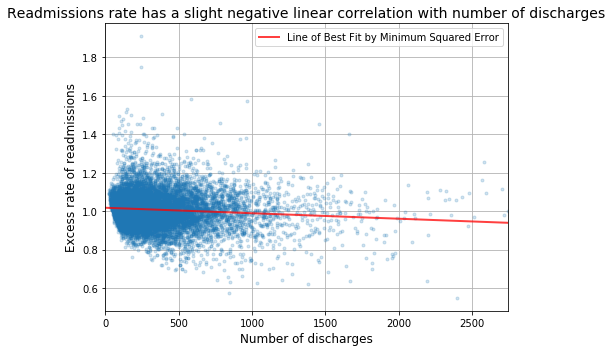

In [87]:
m,b = np.polyfit(x,y,1)
reg_x = np.array([0, max(x)])
y_hat = m*reg_x+b

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, y,alpha=0.2,marker='.',linestyle='none')
ax.plot(reg_x, y_hat,color='red',linewidth=2,alpha=0.75,label='Line of Best Fit by Minimum Squared Error')

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Readmissions rate has a slight negative linear correlation with number of discharges', fontsize=14)
ax.legend()

ax.grid(True)
fig.tight_layout()

#### 1) Setup an appropriate hypothesis test.

We will test the significance of the apparent linear relationship between number of discharges and excess rate of admissions. Our null hypothesis will be that the variables are uncorrelated, and therefore have a pearson correlation coefficient of 0. Our alternative hypothesis will be that the variables are correlated and therefore have a non-zero correlation coefficient.

#### 2) Compute and report the observed significance value (or p-value).

We will do so in the test below.

#### 3) Report statistical significance for  $α$  = .01.

We will do so in the test below.

In [88]:
import scipy.stats as stats

In [92]:
correlation, significance = stats.pearsonr(x,y)
print("The measured pearson correlation coefficient for these variables is " + str(correlation))
print("The probability of a coefficient as or more extreme between uncorrelated variables is " + str(significance))
print("Though the negative correlation is slight, it's existence is statistically significant at alpha = .01.")

The measured pearson correlation coefficient for these variables is -0.0930955428759
The probability of a coefficient as or more extreme between uncorrelated variables is 1.50227564265e-23
Though the negative correlation is slight, it's existence is statistically significant at alpha = .01.


### 4) Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Yes. Statistical significance depends entirely on the exact nature of the hypothesis. In contrast, practical significance is defined by the ways in which that result is or is not useful. In this case, our null hypothesis was simply that the correlation was non-zero. While we we able to demonstrate that a correlation exists, in practical terms the strength of the correlation is not nearly extreme enough to warrant the actions suggested in the first analysis.

It is very likely that there are particular risk factors common to smaller hospitals which differentiate those that are performing well from those that are subpar. At best, this analysis provides a single clue amongst a slew of other variables, such as availablity of resources, that might form a practical basis for understanding how to predict and remedy excess readmission.


### 5) Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

The chart focuses on the outliers rather than emphasizing the central tendency. The advantage of this is to point out what might be happening at the fringes of the measured data. The disadvantage of this is simply that in terms of showing a correlation it amplifies noise rather than signal. To portray the way that the outliers are localized more realistically, we could highlight the data points with a red and green color.

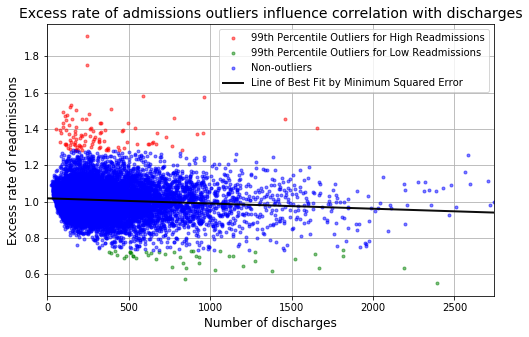

In [157]:
x_vals = np.array(x)
y_vals = np.array(y)
y_z_scores = stats.zscore(y_vals)

m,b = np.polyfit(x,y,1)
reg_x = np.array([0, max(x)])
y_hat = m*reg_x+b

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_vals[y_z_scores >= 3], y_vals[y_z_scores >= 3],color='Red',alpha=0.5,marker='.',linestyle='none',
        label='99th Percentile Outliers for High Readmissions')
ax.plot(x_vals[y_z_scores <= -3], y_vals[y_z_scores <= -3],color='Green',alpha=0.5,marker='.',linestyle='none',
        label='99th Percentile Outliers for Low Readmissions')
ax.plot(x_vals[(y_z_scores > -3) & (y_z_scores < 3)], y_vals[(y_z_scores > -3) & (y_z_scores < 3)],
        color='Blue',alpha=0.5,marker='.',linestyle='none',label='Non-outliers')
ax.plot(reg_x, y_hat,color='Black',linewidth=2,alpha=0.95,label='Line of Best Fit by Minimum Squared Error')

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Excess rate of admissions outliers influence correlation with discharges', fontsize=14)
ax.legend()

ax.grid(True)